<a href="https://colab.research.google.com/github/Rayr07/ML-lab/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

# from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    classification_report
)

In [ ]:
# Load IRIS Dataset
# Column names as per UCI IRIS dataset
columns = [
    "sepal_length",
    "sepal_width",
    "petal_length",
    "petal_width",
    "species"
]

# Load data (no header in iris.data)
df = pd.read_csv('/content/drive/MyDrive/Iris.csv', header=None, names=columns)

# Drop the first row which contains actual column names from the CSV
df = df.iloc[1:].copy()

In [ ]:
print(df.head())

  sepal_length sepal_width petal_length petal_width      species
1          5.1         3.5          1.4         0.2  Iris-setosa
2          4.9         3.0          1.4         0.2  Iris-setosa
3          4.7         3.2          1.3         0.2  Iris-setosa
4          4.6         3.1          1.5         0.2  Iris-setosa
5          5.0         3.6          1.4         0.2  Iris-setosa


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal_length  150 non-null    object
 1   sepal_width   150 non-null    object
 2   petal_length  150 non-null    object
 3   petal_width   150 non-null    object
 4   species       150 non-null    object
dtypes: object(5)
memory usage: 7.0+ KB
None


In [ ]:
df["species"] = df["species"].replace({
    "Iris-setosa": 0,
    "Iris-versicolor": 1,
    "Iris-virginica": 2
})
df.head()


/tmp/ipython-input-1184198628.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["species"] = df["species"].replace({


,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [ ]:
X_lr = df[["sepal_length", "sepal_width", "petal_width"]]
y_lr = df["petal_length"]

In [ ]:
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr, y_lr, test_size=0.2, random_state=42)

In [ ]:
# Train Linear Regression Model
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train_lr, y_train_lr)

LinearRegression()

In [ ]:
# Predictions
y_pred_lr = lr_model.predict(X_test_lr)

In [ ]:
# Evaluate Linear Regression Model
print("LINEAR REGRESSION EVALUATION")
print("Mean Squared Error:", mean_squared_error(y_test_lr, y_pred_lr))
print("Mean Absolute Error:", mean_absolute_error(y_test_lr, y_pred_lr))
print("R2 Score:", r2_score(y_test_lr, y_pred_lr))

LINEAR REGRESSION EVALUATION
Mean Squared Error: 0.12991981605759947
Mean Absolute Error: 0.2606173239288886
R2 Score: 0.9603587427485161


Q1

In [16]:
#a
df=pd.read_csv("/content/TvMarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [17]:
#a
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


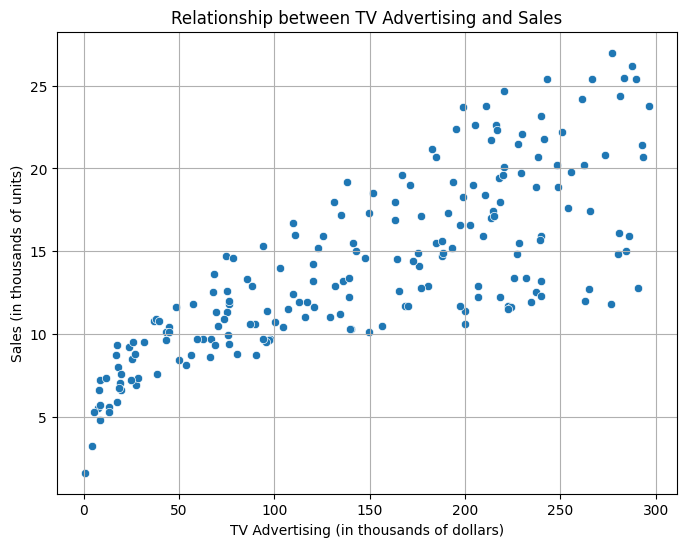

In [18]:
#b
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))

sns.scatterplot(x='TV', y='Sales', data=df)

plt.title('Relationship between TV Advertising and Sales')
plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')

plt.grid(True)

plt.show()

In [25]:
#c
X = df[['TV']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (160, 1)
Shape of X_test: (40, 1)
Shape of y_train: (160,)
Shape of y_test: (40,)


In [26]:
#d
slr_model = LinearRegression()
slr_model.fit(X_train, y_train)

print("Intercept:", slr_model.intercept_)
print("Coefficient:", slr_model.coef_[0])

Intercept: 7.119638430592953
Coefficient: 0.046529733705443346


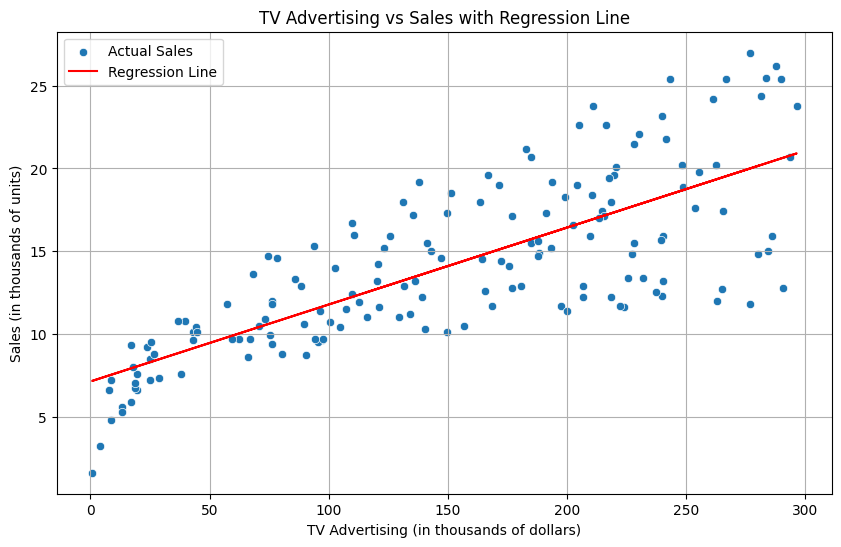

In [21]:
#d
import matplotlib.pyplot as plt
import seaborn as sns

y_train_pred = slr_model.predict(X_train)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train['TV'], y=y_train, label='Actual Sales')

plt.plot(X_train['TV'], y_train_pred, color='red', label='Regression Line')

plt.xlabel('TV Advertising (in thousands of dollars)')
plt.ylabel('Sales (in thousands of units)')
plt.title('TV Advertising vs Sales with Regression Line')
plt.legend()
plt.grid(True)
plt.show()

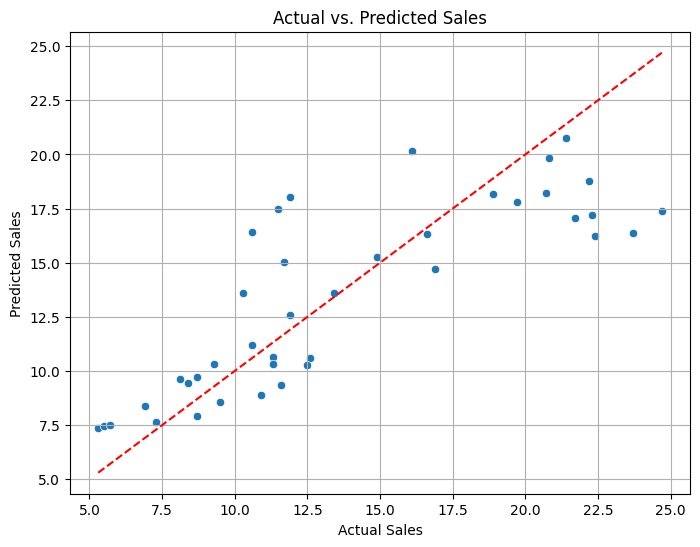

In [22]:
#e
y_pred = slr_model.predict(X_test)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')
plt.grid(True)
plt.show()

In [24]:
#f
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

Mean Squared Error (MSE): 10.2047
Root Mean Squared Error (RMSE): 3.1945
R-squared (R2) Score: 0.6767


Q2

In [ ]:
dfco2=pd.read_csv("/content/drive/MyDrive/archive/vehicle_co2_dataset.csv")

In [ ]:
## a
print(dfco2.head())
print(dfco2.describe())

   vehicle_id      make fuel_type  model_year    engine_cc  vehicle_weight  \
0           1      Ford    Petrol        2015  1723.557940     1584.733203   
1           2  Mercedes    Petrol        2010  1425.111578     1622.249986   
2           3      Audi    Hybrid        2011  1244.080888     1473.990569   
3           4       BMW    Petrol        2009  2177.834260     1831.274096   
4           5    Toyota    Petrol        2007  1848.899157     1732.637242   

   cylinders  annual_mileage_km  vehicle_age    co2_g_km  ...  co2_proxy_51  \
0          4       10529.056031           10  156.791111  ...    149.661615   
1          4       15779.243800           15  143.193198  ...    136.682017   
2          4       14129.167461           14  123.553651  ...    117.935506   
3          4        9290.136453           16  183.750695  ...    175.395312   
4          4       25519.247019           18  188.039024  ...    179.488644   

   co2_proxy_52  co2_proxy_53  co2_proxy_54  co2_proxy_5

In [ ]:
## b
selected_features = dfco2[["engine_cc", "vehicle_weight", "co2_g_km"]]
selected_features = selected_features.rename(columns={
    "engine_cc": "volume",
    "vehicle_weight": "weight",
    "co2_g_km": "CO2"
})

# Ensure the columns are numeric, as correlation requires numerical data
selected_features["volume"] = pd.to_numeric(selected_features["volume"])
selected_features["weight"] = pd.to_numeric(selected_features["weight"])
selected_features["CO2"] = pd.to_numeric(selected_features["CO2"])

print("Selected features for correlation:")
print(selected_features.head())

Selected features for correlation:
        volume       weight         CO2
0  1723.557940  1584.733203  156.791111
1  1425.111578  1622.249986  143.193198
2  1244.080888  1473.990569  123.553651
3  2177.834260  1831.274096  183.750695
4  1848.899157  1732.637242  188.039024


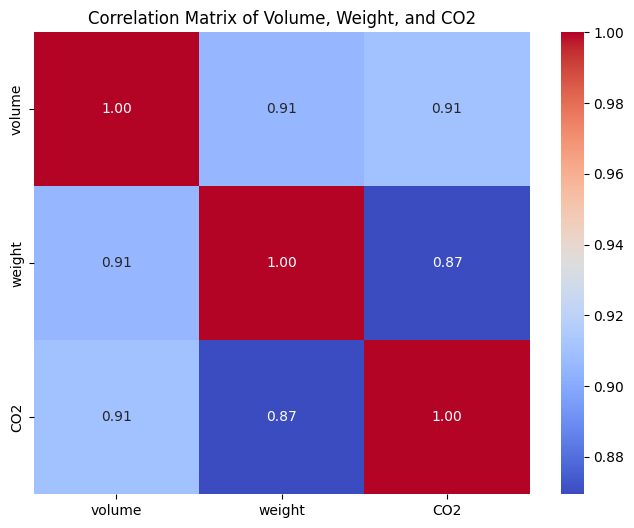

In [ ]:
## c

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = selected_features.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Volume, Weight, and CO2')
plt.show()

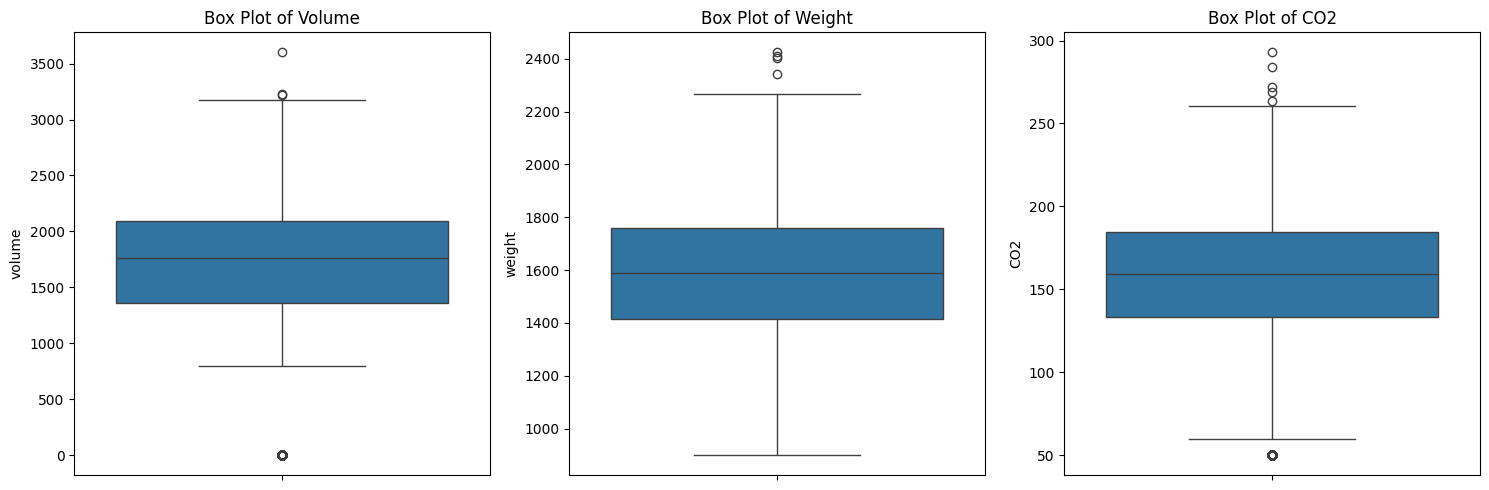

In [ ]:
## d

plt.figure(figsize=(15, 5))

# Create box plots for 'volume', 'weight', and 'CO2'
plt.subplot(1, 3, 1)
sns.boxplot(y=selected_features["volume"])
plt.title('Box Plot of Volume')

plt.subplot(1, 3, 2)
sns.boxplot(y=selected_features["weight"])
plt.title('Box Plot of Weight')

plt.subplot(1, 3, 3)
sns.boxplot(y=selected_features["CO2"])
plt.title('Box Plot of CO2')

plt.tight_layout()
plt.show()

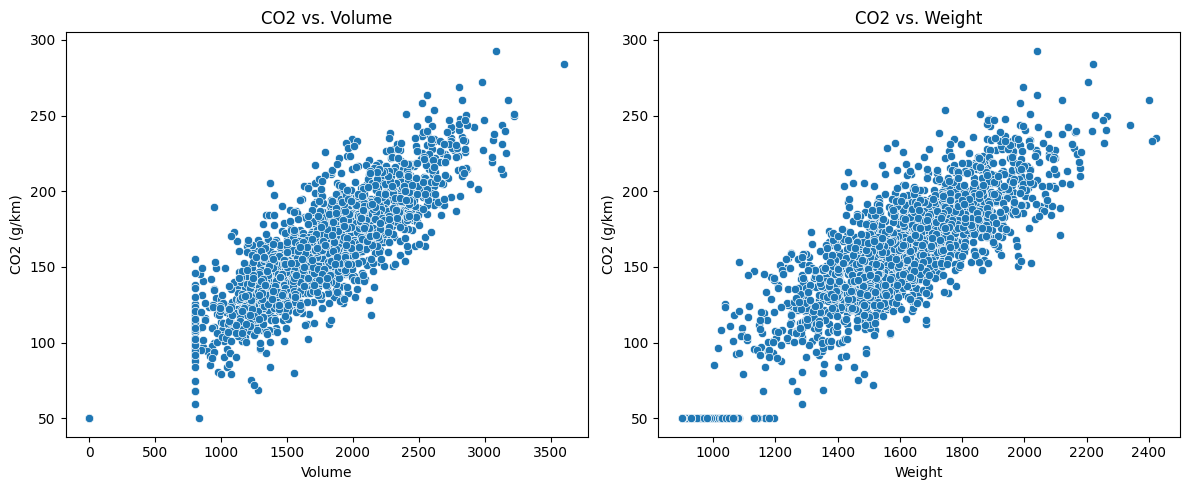

In [ ]:
## d

plt.figure(figsize=(12, 5))

# Scatter plot for CO2 vs. Volume
plt.subplot(1, 2, 1)
sns.scatterplot(x=selected_features["volume"], y=selected_features["CO2"])
plt.title('CO2 vs. Volume')
plt.xlabel('Volume')
plt.ylabel('CO2 (g/km)')

# Scatter plot for CO2 vs. Weight
plt.subplot(1, 2, 2)
sns.scatterplot(x=selected_features["weight"], y=selected_features["CO2"])
plt.title('CO2 vs. Weight')
plt.xlabel('Weight')
plt.ylabel('CO2 (g/km)')

plt.tight_layout()
plt.show()

In [ ]:
## e

X = selected_features[["volume", "weight"]]
y = selected_features["CO2"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model_co2 = LinearRegression()
lr_model_co2.fit(X_train, y_train)

print("Multiple Linear Regression Model trained successfully.")

Multiple Linear Regression Model trained successfully.


Intercept: 19.3961353455511
Coefficients: [0.04656695 0.0372453 ]


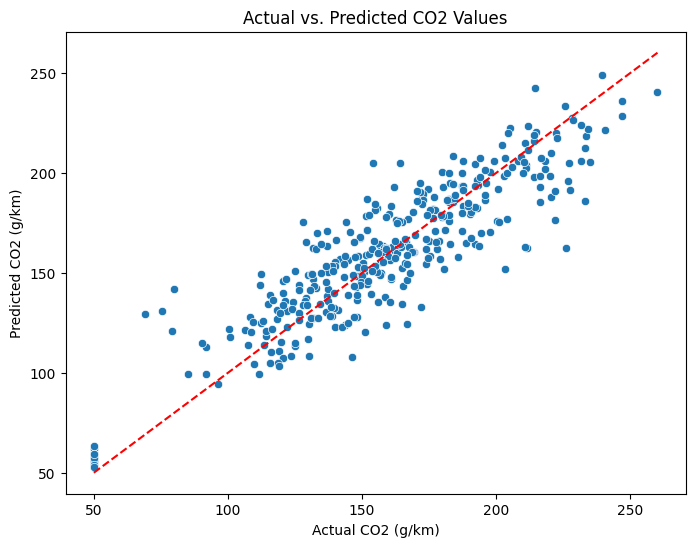

In [ ]:
## f


print("Intercept:", lr_model_co2.intercept_)
print("Coefficients:", lr_model_co2.coef_)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

# Add a diagonal line for perfect predictions
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--')

plt.xlabel('Actual CO2 (g/km)')
plt.ylabel('Predicted CO2 (g/km)')
plt.title('Actual vs. Predicted CO2 Values')
plt.show()

Q3